 Import Libraries

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pynance as pn
import talib
import os

Load the Stock Data

In [63]:
stock_files = {
    "AAPL": "../data/stock_data/AAPL_historical_data.csv",
    "AMZN": "../data/stock_data/AMZN_historical_data.csv",
    "GOOG": "../data/stock_data/GOOG_historical_data.csv",
    "META": "../data/stock_data/META_historical_data.csv",
    "MSFT": "../data/stock_data/MSFT_historical_data.csv",
    "NVDA": "../data/stock_data/NVDA_historical_data.csv",
    "TSLA": "../data/stock_data/TSLA_historical_data.csv"
}

dfs = {}
for symbol, path in stock_files.items():
    try:
        if not os.path.exists(path):
            print(f"File not found: {path}")
            continue
        df = pd.read_csv(path, parse_dates=["Date"])
        df.set_index("Date", inplace=True)
        df.sort_index(inplace=True)
        dfs[symbol] = df
        print(f"Loaded {symbol} with shape: {df.shape}")
    except Exception as e:
        print(f"Error loading {symbol}: {e}")


Loaded AAPL with shape: (10998, 8)
Loaded AMZN with shape: (6846, 8)
Loaded GOOG with shape: (5020, 8)
Loaded META with shape: (2926, 8)
Loaded MSFT with shape: (9672, 8)
Loaded NVDA with shape: (6421, 8)
Loaded TSLA with shape: (3545, 8)


Applying Technical Indicators to stock DataFrame using TA-Lib

a, Calculate Simple Moving Average (SMA),Relative Strength Index (RSI) & Moving Average Convergence Divergence and its signal line:

In [64]:
def add_technical_indicators(df, symbol=None):
    df = df.copy()

    if "Close" not in df.columns:
        print("Missing 'Close' column.")
        return df

    if len(df) < 30:
        print(f"Not enough data: {len(df)} rows. Need at least 30.")
        return df

    print(f"[{symbol}] Calculating indicators...")
    df["SMA_20"] = talib.SMA(df["Close"], timeperiod=20)
    df["RSI"] = talib.RSI(df["Close"], timeperiod=14)
    macd, macd_signal, _ = talib.MACD(df["Close"], fastperiod=12, slowperiod=26, signalperiod=9)
    df["MACD"] = macd
    df["MACD_signal"] = macd_signal

    print(f"[{symbol}] Indicators added.")
    return df

# Apply to each stock DataFrame
for symbol in dfs:
    print(f"\nProcessing {symbol}...")
    dfs[symbol] = add_technical_indicators(dfs[symbol], symbol=symbol)
    print(dfs[symbol][["Close", "SMA_20", "RSI", "MACD", "MACD_signal"]].tail(3))


Processing AAPL...
[AAPL] Calculating indicators...
[AAPL] Indicators added.
                 Close      SMA_20        RSI      MACD  MACD_signal
Date                                                                
2024-07-26  217.960007  224.633500  48.055700  3.026267     5.479431
2024-07-29  218.240005  225.014500  48.476184  2.448591     4.873263
2024-07-30  218.800003  225.117001  49.359115  2.012764     4.301163

Processing AMZN...
[AMZN] Calculating indicators...
[AMZN] Indicators added.
                 Close    SMA_20        RSI      MACD  MACD_signal
Date                                                              
2024-07-26  182.500000  191.4345  41.146719 -2.065994    -0.307283
2024-07-29  183.199997  190.9320  42.432437 -2.133520    -0.672530
2024-07-30  181.710007  190.1575  40.408843 -2.280971    -0.994218

Processing GOOG...
[GOOG] Calculating indicators...
[GOOG] Indicators added.
                 Close      SMA_20        RSI      MACD  MACD_signal
Date             

Add Financial Metrics Using PyNance Logic

In [ ]:
def add_financial_metrics(df):
    df = df.copy()

    df['daily_return'] = df['Close'].pct_change() # % change in close price from the previous day

    # Cumulative returns/ Simulates return from holding the stock over time
    df['cumulative_return'] = (1 + df['daily_return']).cumprod()

    # Rolling volatility/ 30-day rolling standard deviation of returns
    df['rolling_volatility'] = df['daily_return'].rolling(window=30).std()

    # 30-day rolling average of closing prices (like SMA)
    df['rolling_mean'] = df['Close'].rolling(window=30).mean()

    return df
for symbol in dfs:
    print(f"Adding financial metrics to {symbol}")
    dfs[symbol] = add_financial_metrics(dfs[symbol])
    print(dfs[symbol][["Close", "daily_return", "cumulative_return", "rolling_volatility", "rolling_mean"]].tail(3))

Adding financial metrics to AAPL
                 Close  daily_return  cumulative_return  rolling_volatility  \
Date                                                                          
2024-07-26  217.960007      0.002161        1698.195677            0.015335   
2024-07-29  218.240005      0.001285        1700.377237            0.015311   
2024-07-30  218.800003      0.002566        1704.740356            0.015221   

            rolling_mean  
Date                      
2024-07-26    220.403000  
2024-07-29    220.536334  
2024-07-30    220.746667  
Adding financial metrics to AMZN
                 Close  daily_return  cumulative_return  rolling_volatility  \
Date                                                                          
2024-07-26  182.500000      0.014734        1863.823481            0.016795   
2024-07-29  183.199997      0.003836        1870.972362            0.016546   
2024-07-30  181.710007     -0.008133        1855.755492            0.016613   

       

Visualizing the data and technical indicators

Visualizing indicators for AAPL


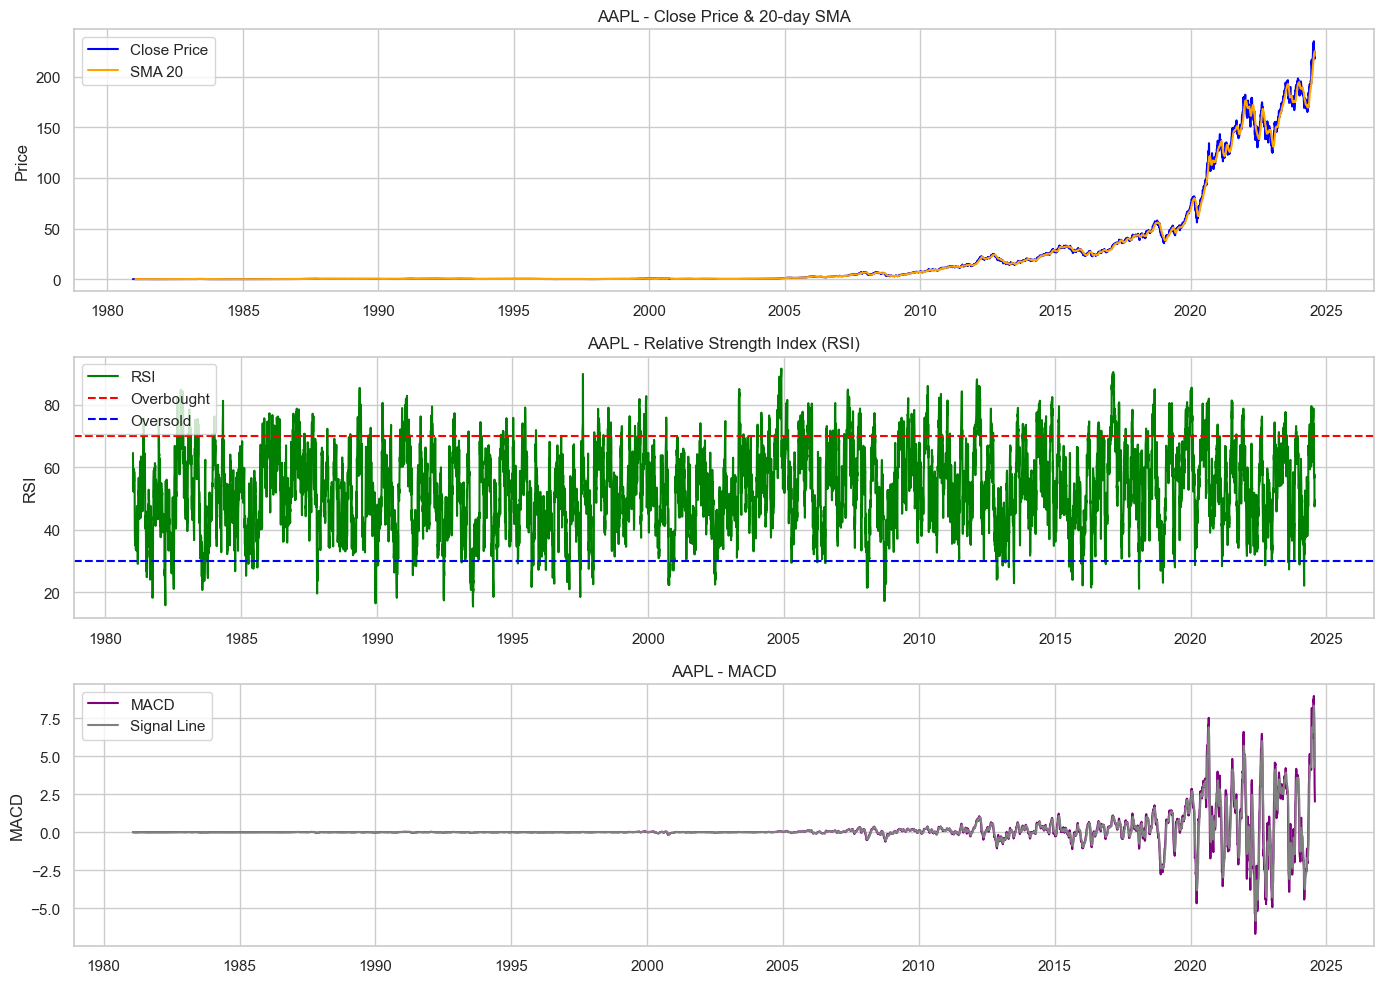

Visualizing indicators for AMZN


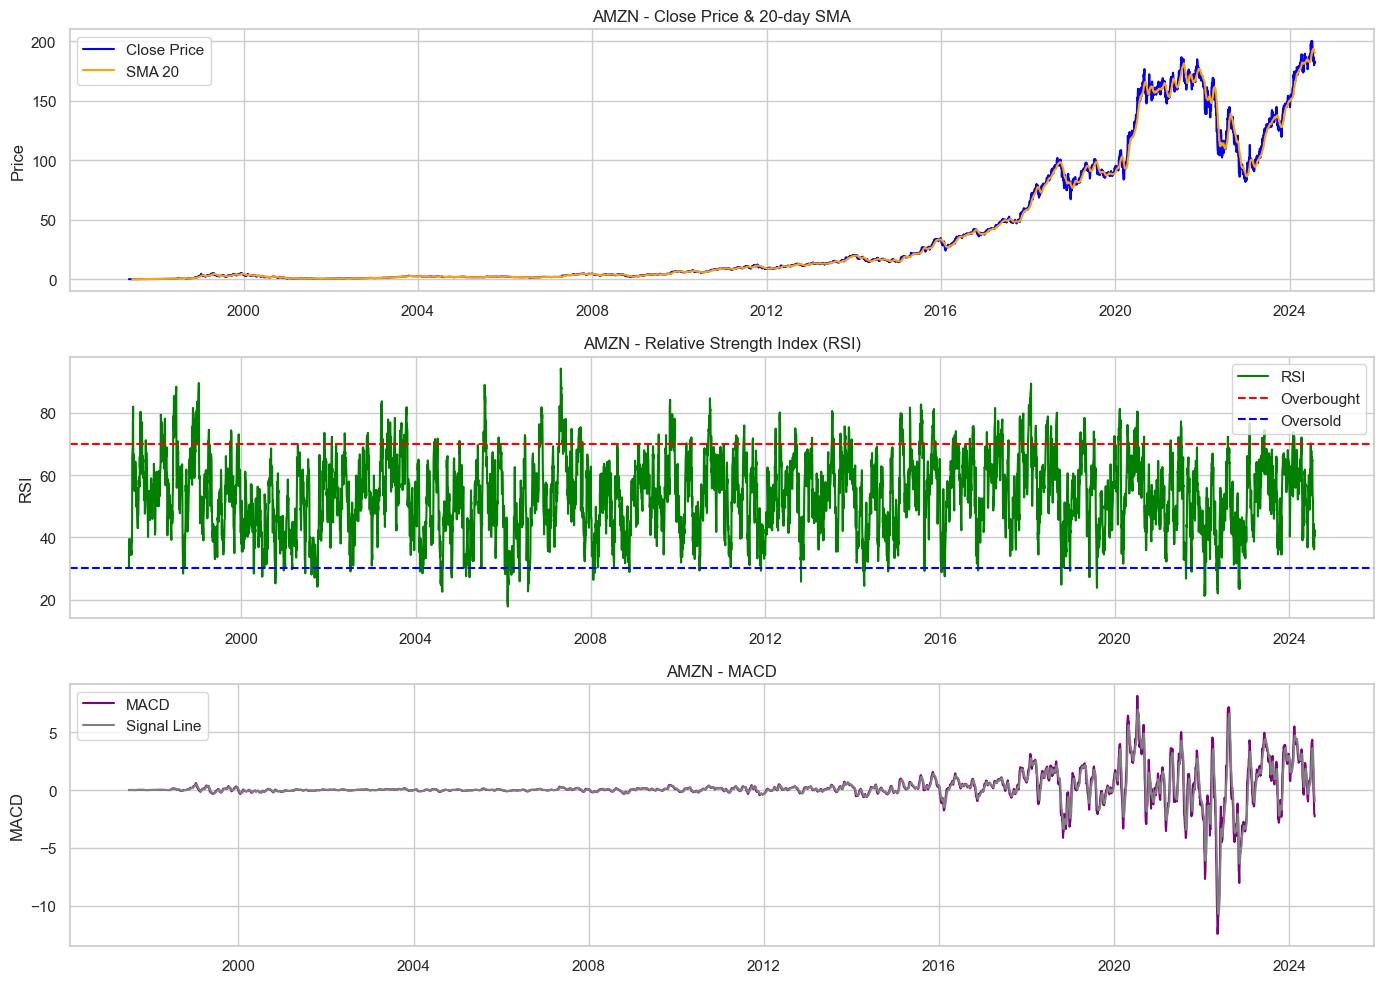

Visualizing indicators for GOOG


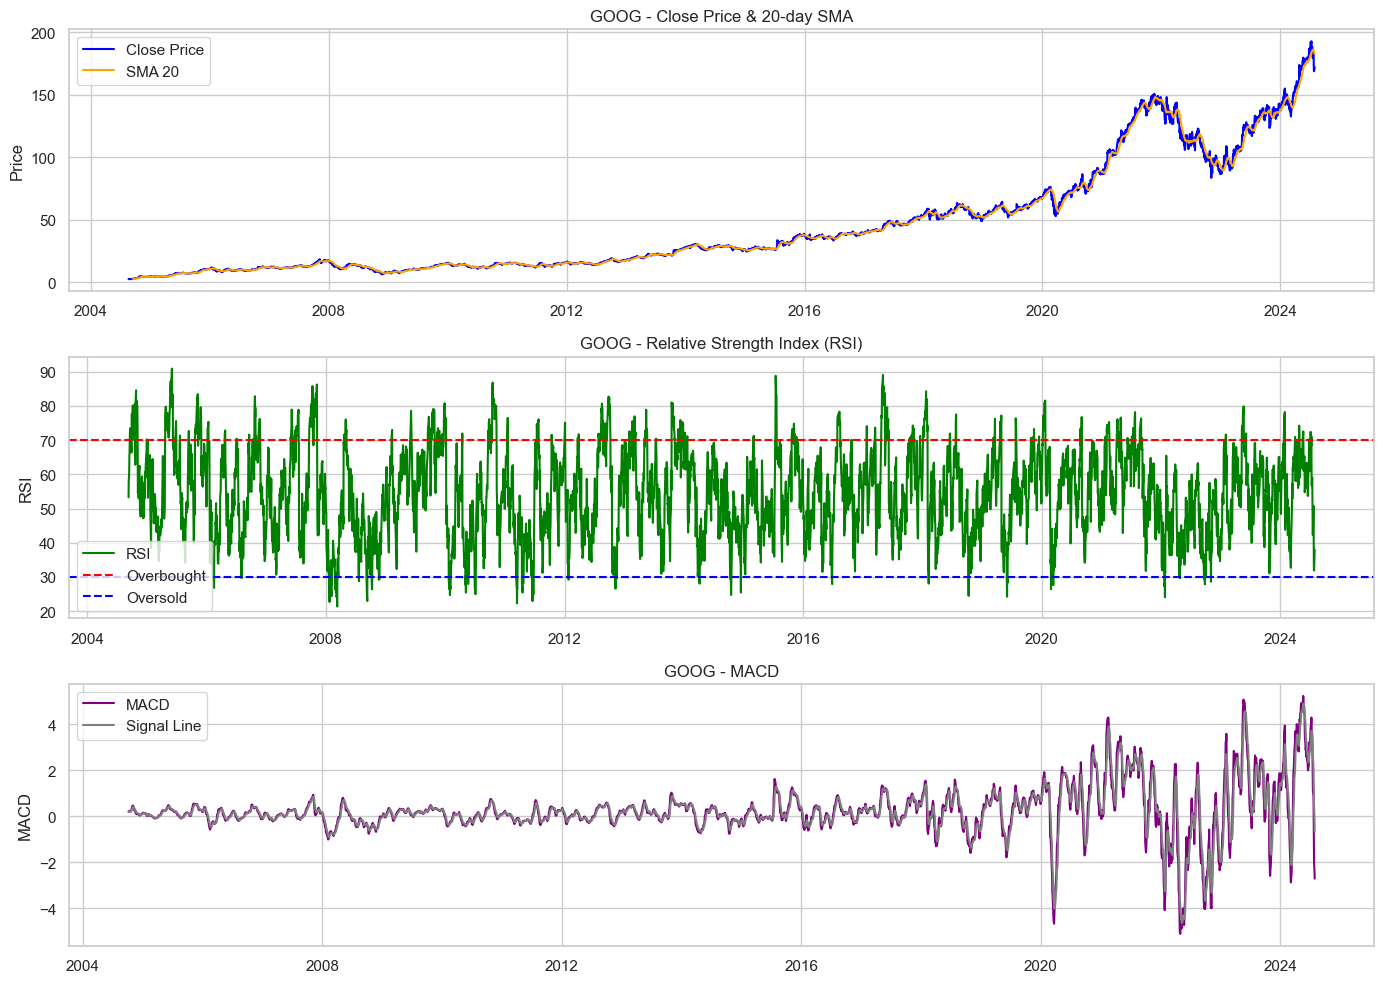

Visualizing indicators for META


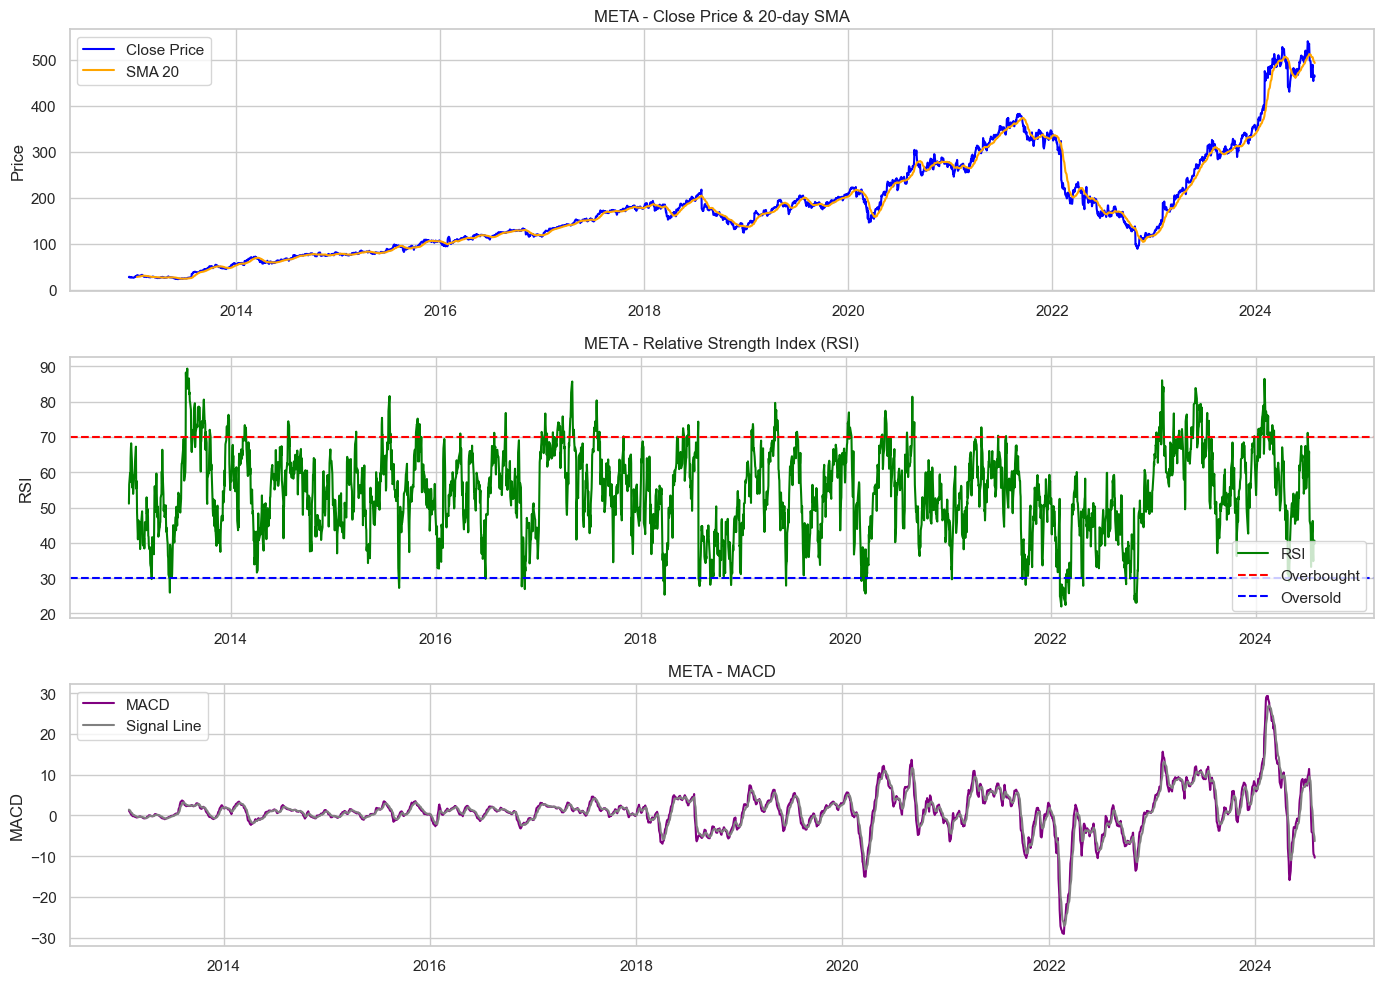

Visualizing indicators for MSFT


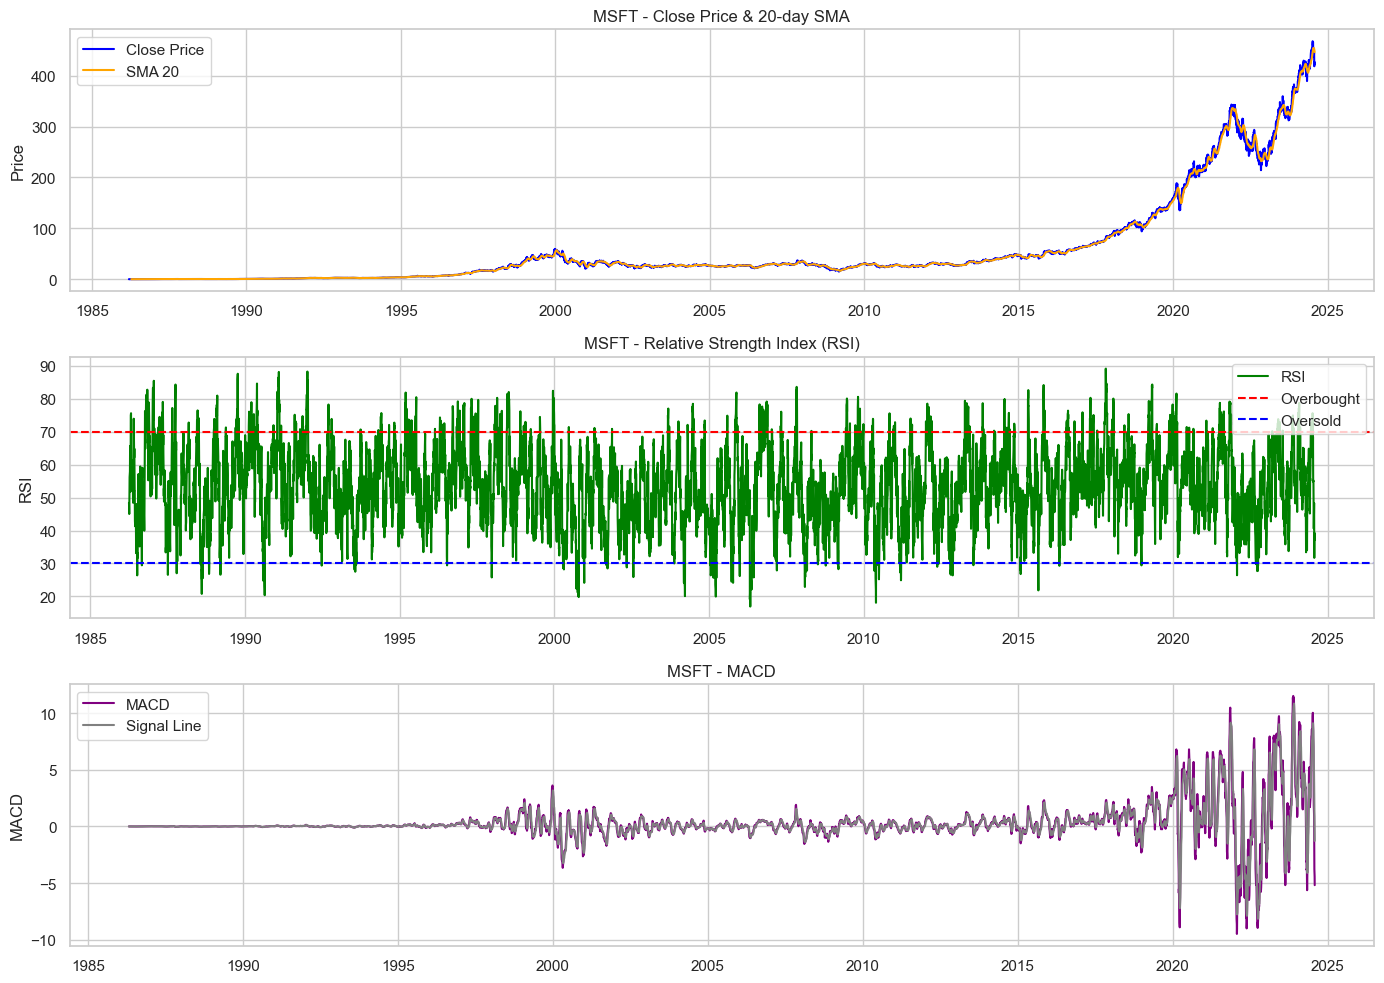

Visualizing indicators for NVDA


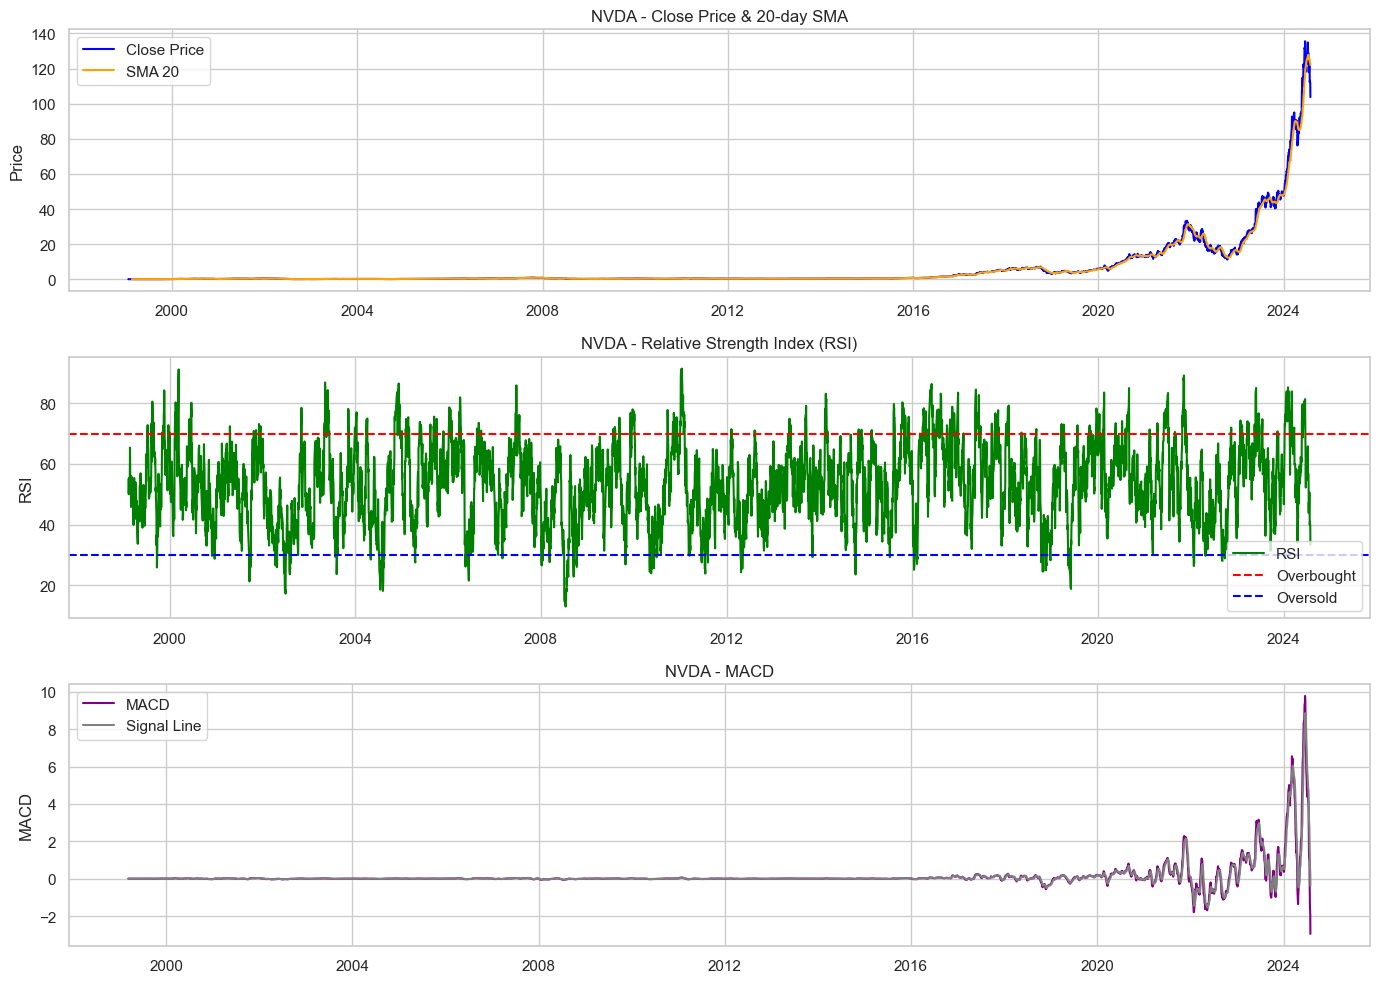

Visualizing indicators for TSLA


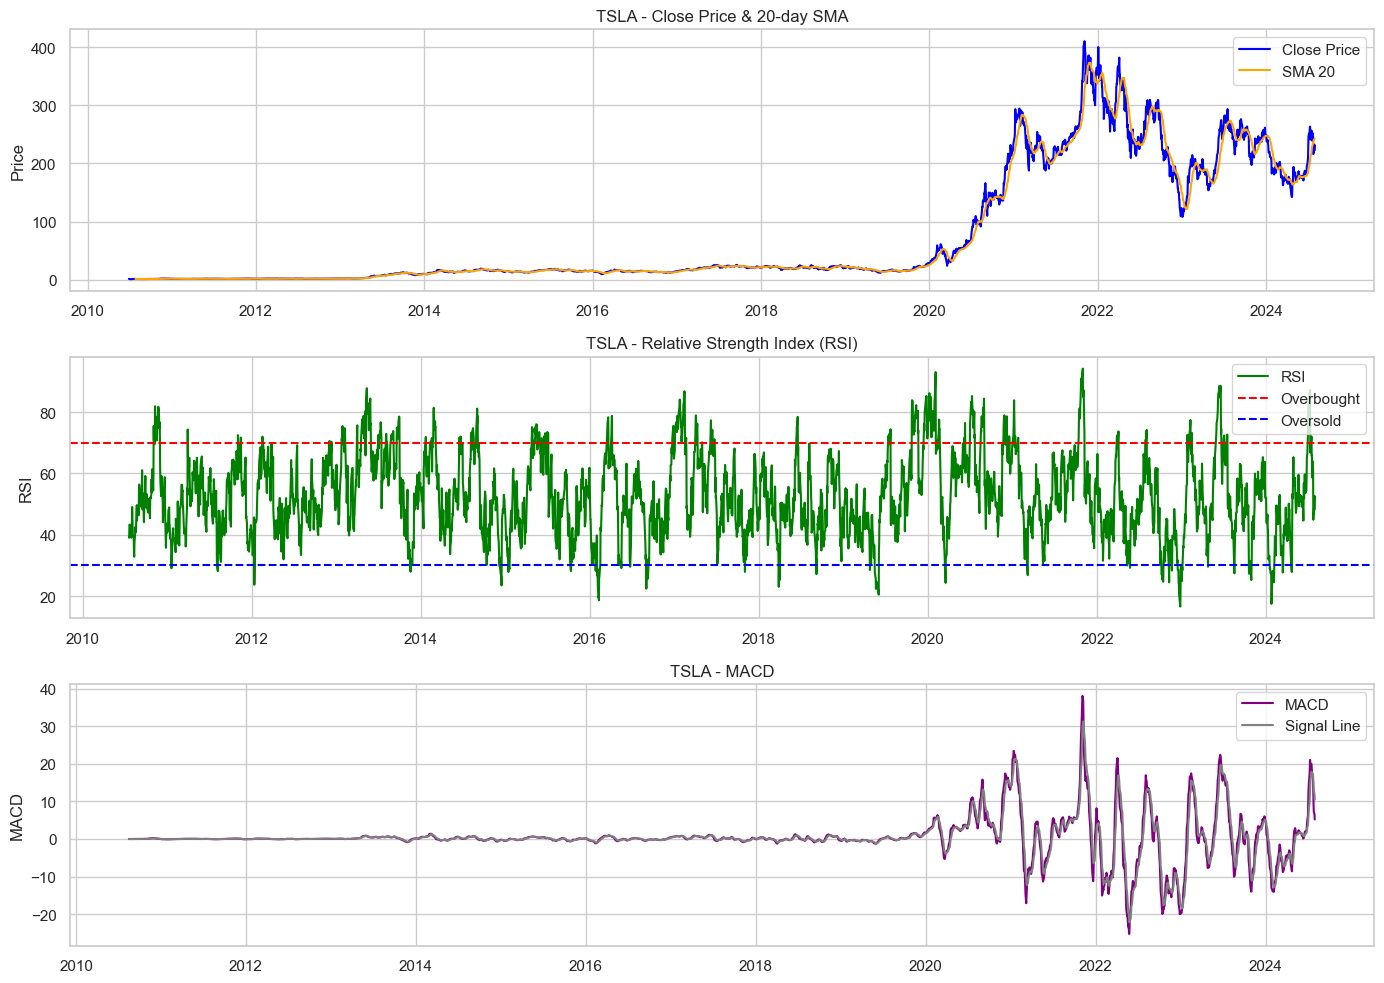

In [68]:
sns.set(style='whitegrid') 
def plot_technical_indicators(df, symbol):
    required_cols = ['Close', 'SMA_20', 'RSI', 'MACD', 'MACD_signal']
    for col in required_cols:
        if col not in df.columns:
            print(f"Skipping {symbol}: missing '{col}'")
            return

    plt.figure(figsize=(14, 10))

    # Subplot 1: Close Price and SMA
    plt.subplot(3, 1, 1)
    plt.plot(df.index, df['Close'], label='Close Price', color='blue')
    plt.plot(df.index, df['SMA_20'], label='SMA 20', color='orange')
    plt.title(f'{symbol} - Close Price & 20-day SMA')
    plt.ylabel('Price')
    plt.legend()

    # Subplot 2: RSI
    plt.subplot(3, 1, 2)
    plt.plot(df.index, df['RSI'], label='RSI', color='green')
    plt.axhline(70, color='red', linestyle='--', label='Overbought')
    plt.axhline(30, color='blue', linestyle='--', label='Oversold')
    plt.title(f'{symbol} - Relative Strength Index (RSI)')
    plt.ylabel('RSI')
    plt.legend()

    # Subplot 3: MACD
    plt.subplot(3, 1, 3)
    plt.plot(df.index, df['MACD'], label='MACD', color='purple')
    plt.plot(df.index, df['MACD_signal'], label='Signal Line', color='gray')
    plt.title(f'{symbol} - MACD')
    plt.ylabel('MACD')
    plt.legend()

    plt.tight_layout()
    plt.show()

for symbol, df in dfs.items():
    print(f"Visualizing indicators for {symbol}")
    plot_technical_indicators(df, symbol)

Correlation between news and stock movement

Data Preparation, Confirming Normalize Dates(YYYY-MM-DD):

In [79]:
df['date'] = df.index.normalize()

for symbol, df in dfs.items():
    print(f"\n {symbol} Data Sample:")
    print(df[['date']].head(3))
    print(f"Index type: {type(df.index)} | Sample index: {df.index[:1]}")



 AAPL Data Sample:
                 date
Date                 
1980-12-12 1980-12-12
1980-12-15 1980-12-15
1980-12-16 1980-12-16
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'> | Sample index: DatetimeIndex(['1980-12-12'], dtype='datetime64[ns]', name='Date', freq=None)

 AMZN Data Sample:
                 date
Date                 
1997-05-15 1997-05-15
1997-05-16 1997-05-16
1997-05-19 1997-05-19
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'> | Sample index: DatetimeIndex(['1997-05-15'], dtype='datetime64[ns]', name='Date', freq=None)

 GOOG Data Sample:
                 date
Date                 
2004-08-19 2004-08-19
2004-08-20 2004-08-20
2004-08-23 2004-08-23
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'> | Sample index: DatetimeIndex(['2004-08-19'], dtype='datetime64[ns]', name='Date', freq=None)

 META Data Sample:
                 date
Date                 
2012-12-12 2012-12-12
2012-12-13 2012-12-13
2012-12-14 2012-12-14


Load the sentiment data

In [87]:
daily_sentiment = pd.read_csv("../data/processed/daily_sentiment.csv", parse_dates=["date"])
daily_sentiment.set_index("date", inplace=True)

df = pd.read_csv("../data/processed/daily_sentiment.csv")
print(df.columns)
print(df.head())
print(daily_sentiment.index)


Index(['date', 'avg_sentiment'], dtype='object')
         date  avg_sentiment
0  2009-02-14       0.000000
1  2009-04-27       0.000000
2  2009-04-29       0.000000
3  2009-05-22       0.000000
4  2009-05-27       0.234091
DatetimeIndex(['2009-02-14', '2009-04-27', '2009-04-29', '2009-05-22',
               '2009-05-27', '2009-05-29', '2009-05-30', '2009-06-01',
               '2009-06-02', '2009-06-05',
               ...
               '2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05',
               '2020-06-06', '2020-06-07', '2020-06-08', '2020-06-09',
               '2020-06-10', '2020-06-11'],
              dtype='datetime64[ns]', name='date', length=3955, freq=None)


Correlation Analysis Loop:

In [88]:
correlation_results = {}

for symbol, df in dfs.items():
    print(f"\n🔍 Analyzing {symbol}...")

    # Merge daily return with sentiment
    merged = pd.merge(df, daily_sentiment, on="date", how="inner")
    merged.dropna(subset=["daily_return", "avg_sentiment"], inplace=True)

    # Pearson correlation
    correlation = merged["daily_return"].corr(merged["avg_sentiment"])
    correlation_results[symbol] = correlation

    print(f"📊 {symbol} correlation: {correlation:.4f}")



🔍 Analyzing AAPL...
📊 AAPL correlation: 0.0455

🔍 Analyzing AMZN...
📊 AMZN correlation: 0.0059

🔍 Analyzing GOOG...
📊 GOOG correlation: 0.0174

🔍 Analyzing META...
📊 META correlation: 0.0877

🔍 Analyzing MSFT...
📊 MSFT correlation: 0.0329

🔍 Analyzing NVDA...
📊 NVDA correlation: -0.0264

🔍 Analyzing TSLA...
📊 TSLA correlation: 0.0500


Plot Correlation

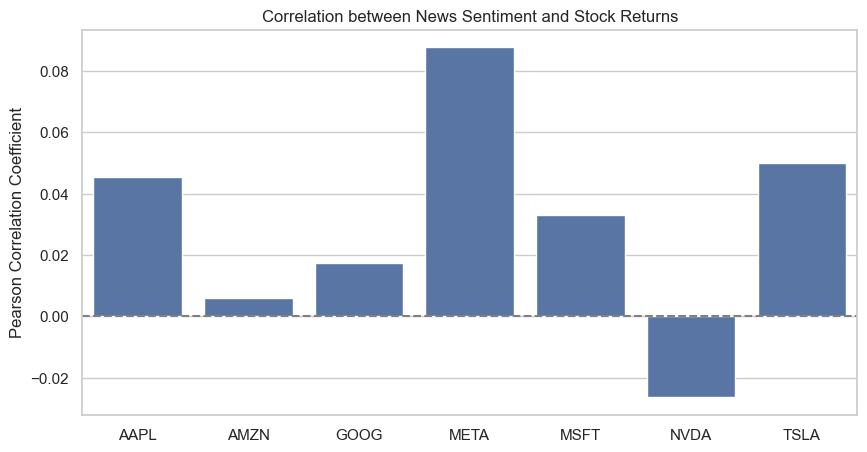

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(x=list(correlation_results.keys()), y=list(correlation_results.values()))
plt.axhline(0, color='gray', linestyle='--')
plt.title("Correlation between News Sentiment and Stock Returns")
plt.ylabel("Pearson Correlation Coefficient")
plt.show()
